In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housing-price-prediction/Housing.csv


# import needed liberarirs

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,accuracy_score


# read data

In [3]:
df = pd.read_csv('/kaggle/input/housing-price-prediction/Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df.sample()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
260,4473000,3162,3,1,2,yes,no,no,no,yes,1,no,furnished


In [6]:
df.sample(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
359,3710000,3600,3,1,1,yes,no,no,no,no,1,no,unfurnished
282,4270000,2175,3,1,2,no,yes,yes,no,yes,0,no,unfurnished
520,2450000,7700,2,1,1,yes,no,no,no,no,0,no,unfurnished
158,5495000,7980,3,1,1,yes,no,no,no,no,2,no,semi-furnished
171,5250000,10269,3,1,1,yes,no,no,no,no,1,yes,semi-furnished
63,7035000,6360,4,2,3,yes,no,no,no,yes,2,yes,furnished
377,3640000,2850,3,2,2,no,no,yes,no,no,0,yes,unfurnished
100,6230000,6600,3,2,1,yes,no,yes,no,yes,0,yes,unfurnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
95,6300000,4100,3,2,3,yes,no,no,no,yes,2,no,semi-furnished


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [8]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [9]:
df.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

# Missing Value

In [10]:
df.isnull()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,False,False,False,False,False,False,False,False,False,False,False,False,False
541,False,False,False,False,False,False,False,False,False,False,False,False,False
542,False,False,False,False,False,False,False,False,False,False,False,False,False
543,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df.shape

(545, 13)

# data visualization

In [14]:
bedrooms_count = df['bedrooms'].value_counts()
bedrooms_count

bedrooms
3    300
2    136
4     95
5     10
6      2
1      2
Name: count, dtype: int64

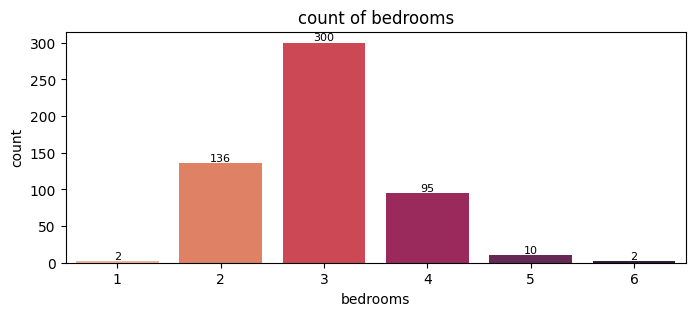

In [15]:
plt.figure(figsize=(8,3))
ax=sns.barplot(x=bedrooms_count.index, y=bedrooms_count.values,palette="rocket_r")
ax.bar_label(ax.containers[0], fontsize=8);
plt.title('count of bedrooms')
plt.xlabel('bedrooms')
plt.ylabel('count')
plt.show()

In [16]:
count_bathrooms = df['bathrooms'].value_counts()
count_bathrooms

bathrooms
1    401
2    133
3     10
4      1
Name: count, dtype: int64

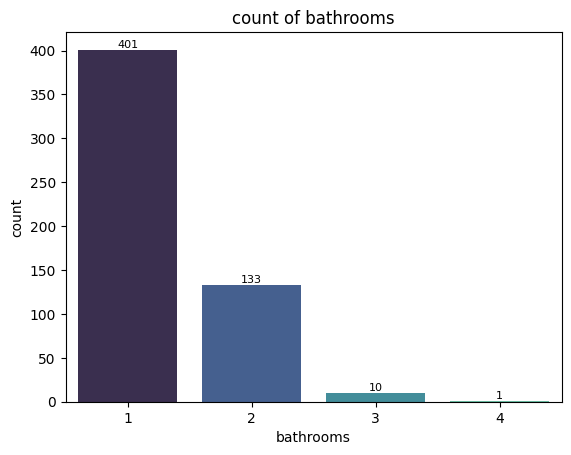

In [17]:
ax = sns.barplot(x=count_bathrooms.index,y=count_bathrooms.values,palette="mako")
ax.bar_label(ax.containers[0], fontsize=8);
plt.title('count of bathrooms')
plt.xlabel('bathrooms')
plt.ylabel('count')
plt.show()

In [18]:
stories_count = df['stories'].value_counts()
stories_count


stories
2    238
1    227
4     41
3     39
Name: count, dtype: int64

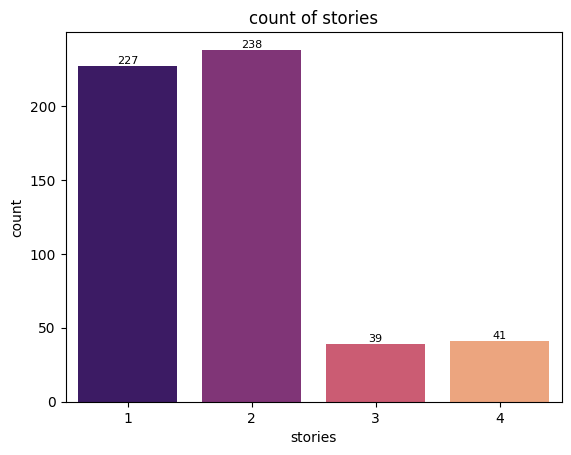

In [19]:
ax = sns.barplot(x=stories_count.index,y=stories_count.values,palette="magma")
ax.bar_label(ax.containers[0], fontsize=8)
plt.title('count of stories')
plt.xlabel('stories')
plt.ylabel('count')
plt.show()

In [20]:
count_mainroad=df['mainroad'].value_counts()
count_mainroad

mainroad
yes    468
no      77
Name: count, dtype: int64

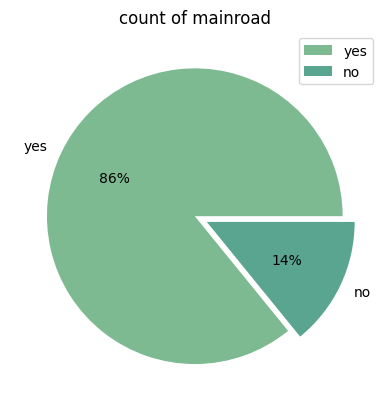

In [21]:
explode = [0, 0.09]
colors = sns.color_palette("crest")
plt.pie(count_mainroad.values, 
        labels=count_mainroad.index, 
        autopct='%.0f%%',explode=explode, 
        colors = colors) 
plt.title("count of mainroad")
plt.legend(loc = "best")

plt.show()


In [22]:
guestroom_count = df['guestroom'].value_counts()
guestroom_count

guestroom
no     448
yes     97
Name: count, dtype: int64

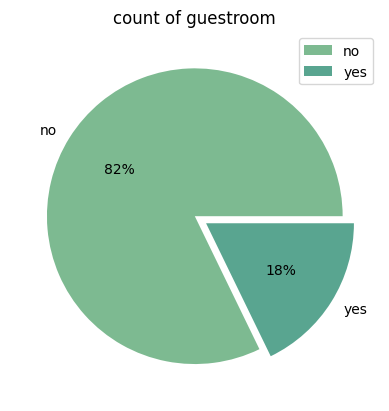

In [23]:
explode = [0, 0.09]
colors = sns.color_palette("crest")
plt.pie(guestroom_count.values, 
        labels=guestroom_count.index, 
        autopct='%.0f%%',explode=explode, 
        colors = colors) 
plt.title("count of guestroom")
plt.legend(loc = "best")

plt.show()


In [24]:
furnishingstatus_count = df.furnishingstatus.value_counts()
furnishingstatus_count

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

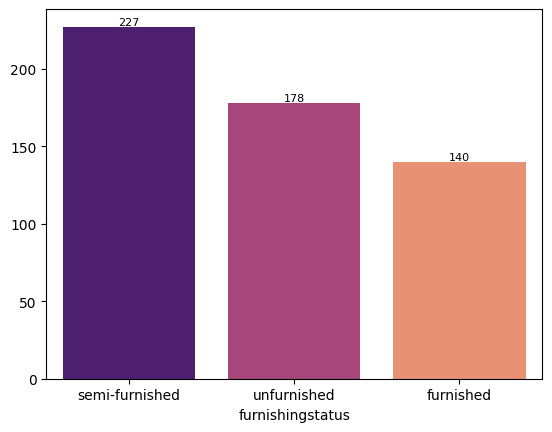

In [25]:
ax = sns.barplot(x=furnishingstatus_count.index,
                 y=furnishingstatus_count.values,
                 palette="magma"
                
                )
ax.bar_label(ax.containers[0], fontsize=8)
plt.show()

In [26]:
prefarea_count = df.prefarea.value_counts()
prefarea_count

prefarea
no     417
yes    128
Name: count, dtype: int64

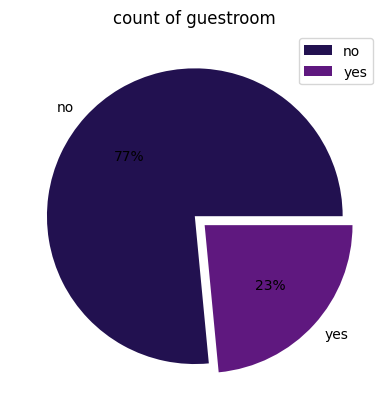

In [27]:
explode = [0, 0.09]
colors = sns.color_palette("magma")
plt.pie(prefarea_count.values, 
        labels=prefarea_count.index, 
        autopct='%.0f%%',explode=explode, 
        colors = colors) 
plt.title("count of guestroom")
plt.legend(loc = "best")

plt.show()

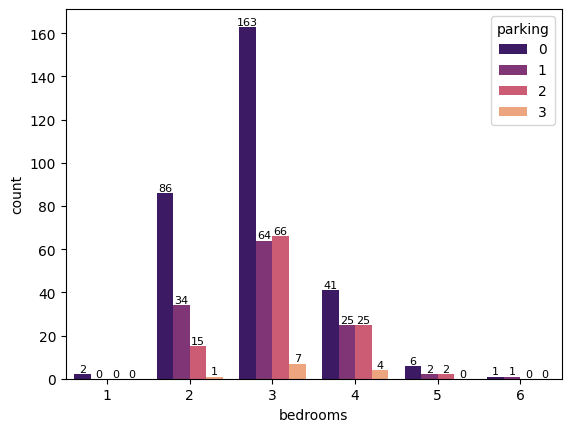

In [28]:
ax = sns.countplot(df, x="bedrooms", hue="parking",palette="magma")
for i in range(len(df['parking'].unique())):
    ax.bar_label(ax.containers[i], fontsize=8)


plt.show()

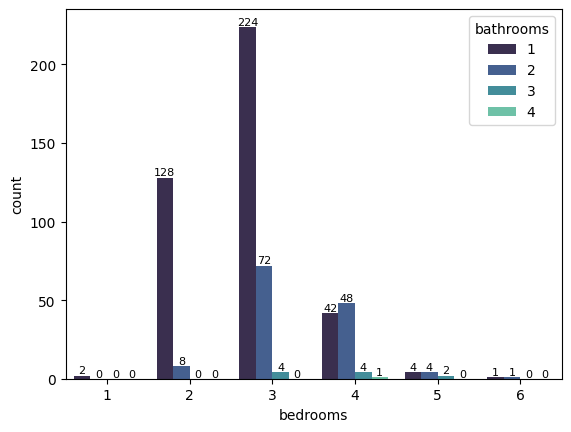

In [29]:
ax = sns.countplot(df, x="bedrooms", hue="bathrooms",palette="mako")
for i in range(len(df['bathrooms'].unique())):
    ax.bar_label(ax.containers[i], fontsize=8)
plt.show()

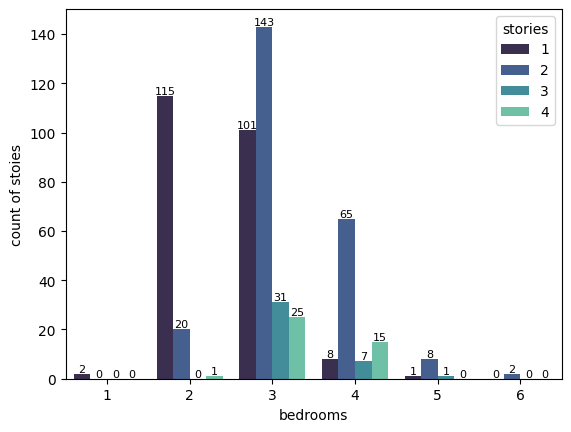

In [30]:
ax = sns.countplot(df, x="bedrooms", hue="stories",palette="mako")
for i in range(len(df['stories'].unique())):
    ax.bar_label(ax.containers[i], fontsize=8)
plt.ylabel('count of stoies')
plt.show()

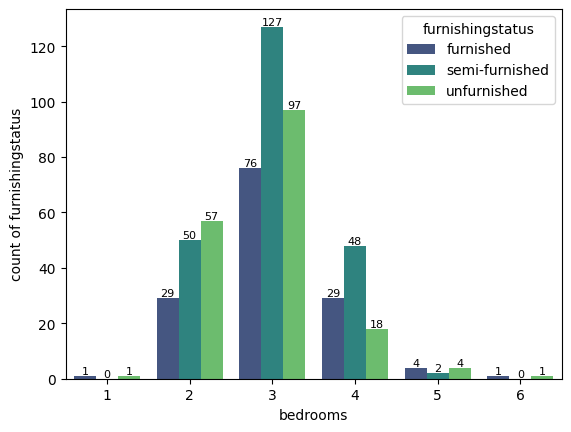

In [31]:
ax = sns.countplot(df, x="bedrooms", hue="furnishingstatus",palette="viridis")
for i in range(len(df['furnishingstatus'].unique())):
    ax.bar_label(ax.containers[i], fontsize=8)
plt.ylabel('count of furnishingstatus')
plt.show()

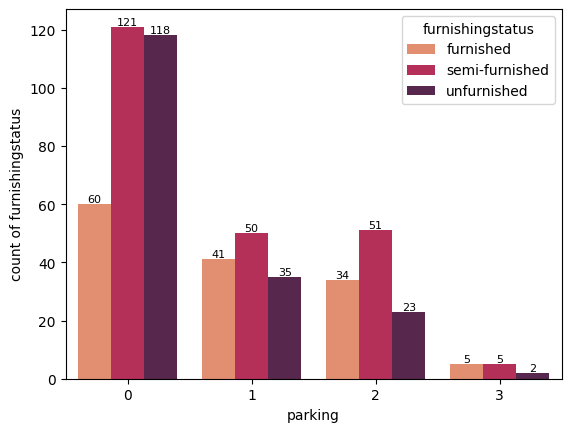

In [32]:
ax = sns.countplot(df, x="parking", hue="furnishingstatus",palette="rocket_r")
for i in range(len(df['furnishingstatus'].unique())):
    ax.bar_label(ax.containers[i], fontsize=8)
plt.ylabel('count of furnishingstatus')
plt.show()

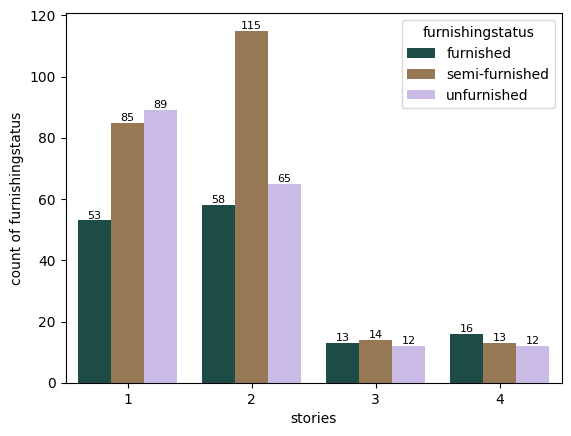

In [33]:
ax = sns.countplot(df, x="stories", hue="furnishingstatus",palette="cubehelix")
for i in range(len(df['furnishingstatus'].unique())):
    ax.bar_label(ax.containers[i], fontsize=8)
plt.ylabel('count of furnishingstatus')
plt.show()

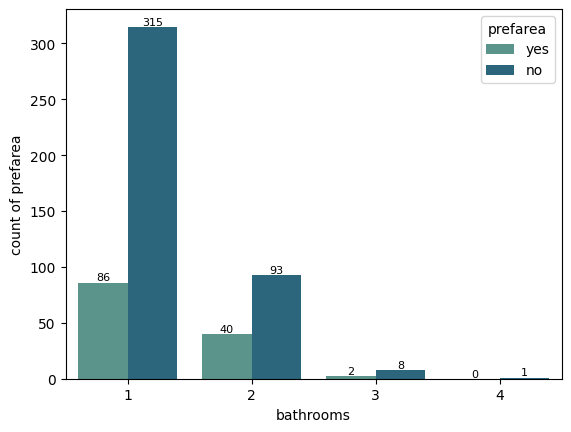

In [34]:
ax = sns.countplot(df, x="bathrooms", hue="prefarea",palette="crest")
for i in range(len(df['prefarea'].unique())):
    ax.bar_label(ax.containers[i], fontsize=8)
plt.ylabel('count of prefarea')
plt.show()

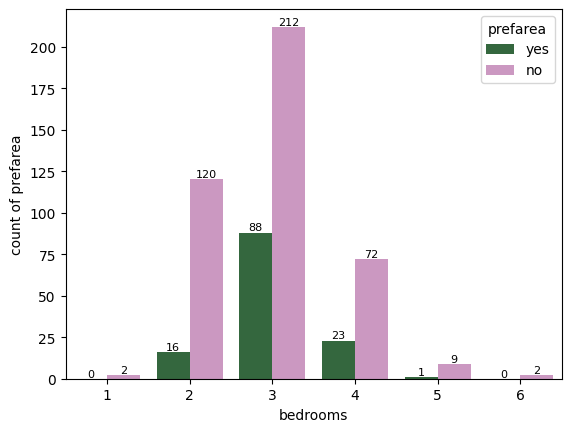

In [35]:
ax = sns.countplot(df, x="bedrooms", hue="prefarea",palette="cubehelix")
for i in range(len(df['prefarea'].unique())):
    ax.bar_label(ax.containers[i], fontsize=8)
plt.ylabel('count of prefarea')
plt.show()

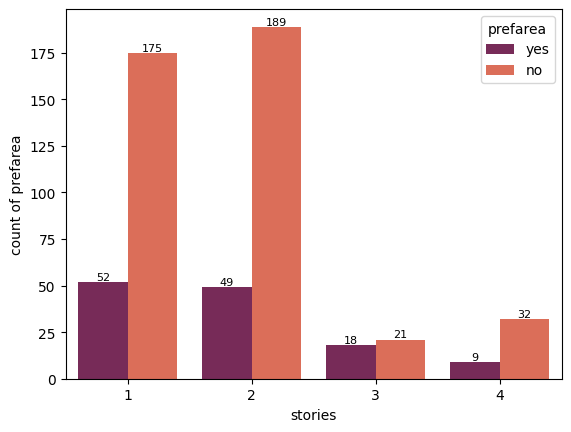

In [36]:
ax = sns.countplot(df, x="stories", hue="prefarea",palette="rocket")
for i in range(len(df['prefarea'].unique())):
    ax.bar_label(ax.containers[i], fontsize=8)
plt.ylabel('count of prefarea')
plt.show()

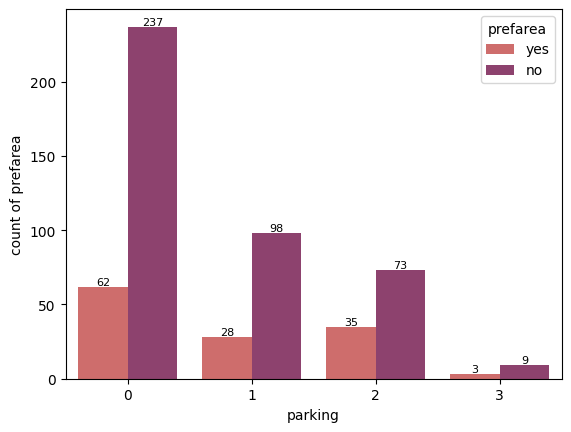

In [37]:
ax = sns.countplot(df, x="parking", hue="prefarea",palette="flare")
for i in range(len(df['prefarea'].unique())):
    ax.bar_label(ax.containers[i], fontsize=8)
plt.ylabel('count of prefarea')
plt.show()

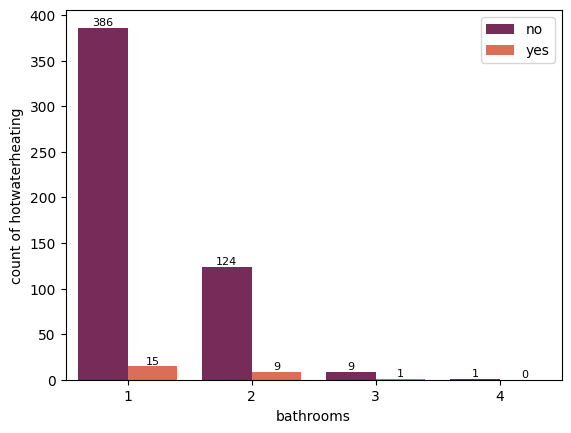

In [38]:
ax = sns.countplot(df, x="bathrooms", hue="hotwaterheating",palette="rocket")
for i in range(len(df['hotwaterheating'].unique())):
    ax.bar_label(ax.containers[i], fontsize=8)
plt.ylabel('count of hotwaterheating')
plt.legend(loc = 'best')
plt.show()

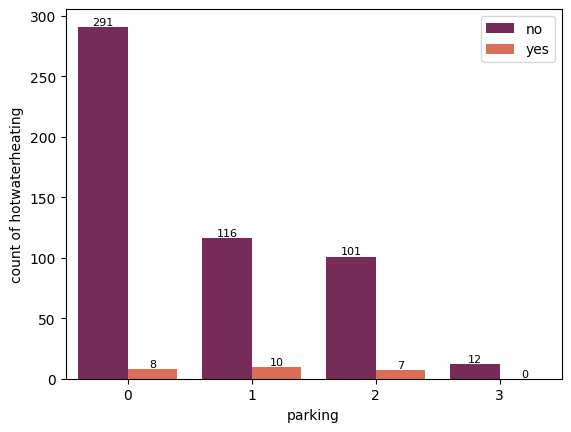

In [39]:
ax = sns.countplot(df, x="parking", hue="hotwaterheating",palette="rocket")
for i in range(len(df['hotwaterheating'].unique())):
    ax.bar_label(ax.containers[i], fontsize=8)
plt.ylabel('count of hotwaterheating')
plt.legend(loc = 'best')
plt.show()

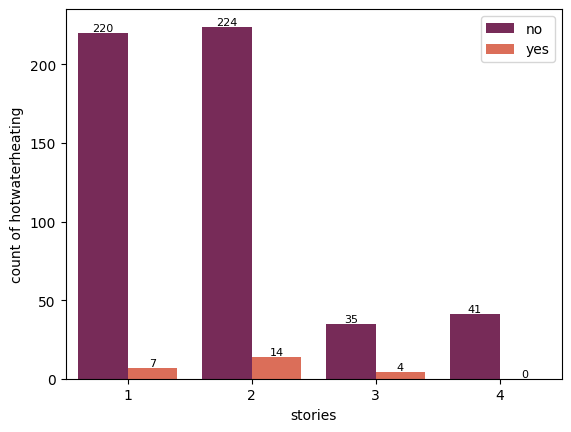

In [40]:
ax = sns.countplot(df, x="stories", hue="hotwaterheating",palette="rocket")
for i in range(len(df['hotwaterheating'].unique())):
    ax.bar_label(ax.containers[i], fontsize=8)
plt.ylabel('count of hotwaterheating')
plt.legend(loc = 'best')
plt.show()

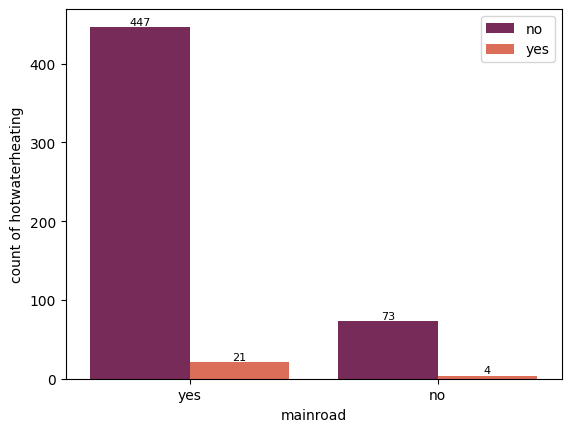

In [41]:
ax = sns.countplot(df, x="mainroad", hue="hotwaterheating",palette="rocket")
for i in range(len(df['hotwaterheating'].unique())):
    ax.bar_label(ax.containers[i], fontsize=8)
plt.ylabel('count of hotwaterheating')
plt.legend(loc = 'best')
plt.show()

# data encoding

In [42]:
encoder = LabelEncoder()

In [43]:
encoding_col = ['furnishingstatus','prefarea','airconditioning','hotwaterheating','basement','guestroom','mainroad']
for col in encoding_col:
    df[col]=encoder.fit_transform(df[col])

In [44]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


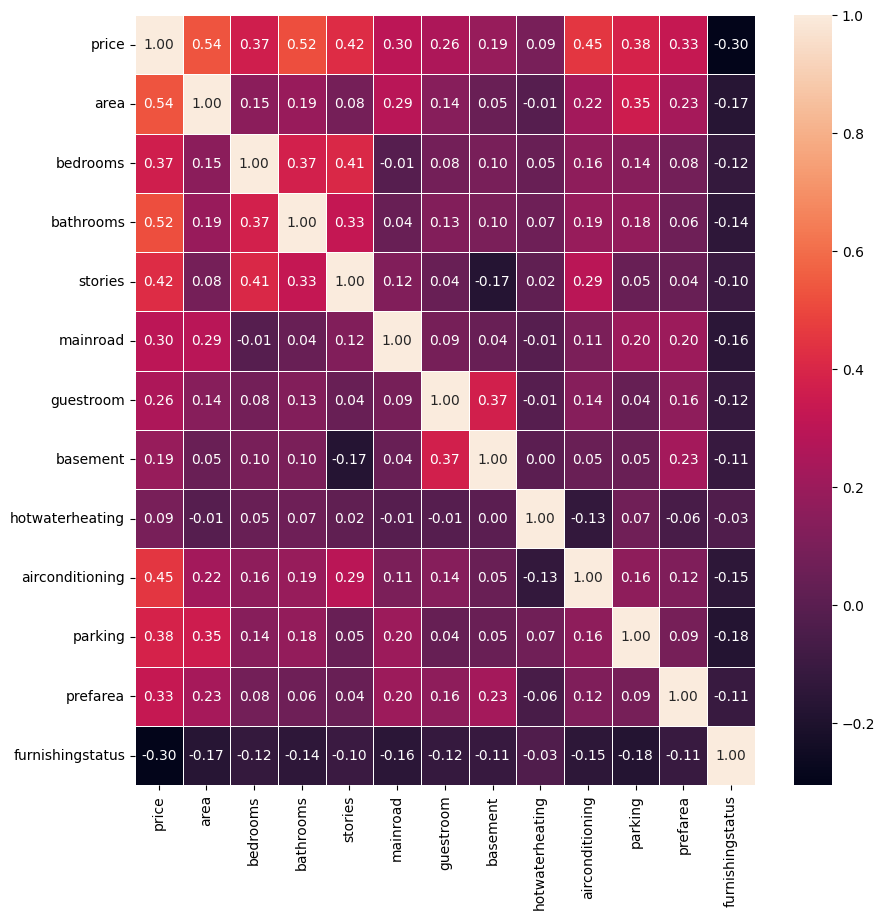

In [45]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", linewidths=0.5, cbar=True)
plt.show()

# feature and target

In [46]:
x=df.drop(columns=['price'],axis = 1)
y=df['price']

# data splitting

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)

# models

**linear model**

In [48]:
ln_model = LinearRegression()
ln_model.fit(x_train, y_train)

LinearRegression()

In [49]:
y_pred = ln_model.predict(x_test)

In [50]:
ln_acc = r2_score(y_test, y_pred)
ln_acc

0.7624579467323476

**AdaBoostRegressor**

In [51]:
abr_model = AdaBoostRegressor()
abr_model.fit(x_train, y_train)

AdaBoostRegressor()

In [52]:
y_pred = abr_model.predict(x_test)

In [53]:
abr_acc = r2_score(y_test, y_pred)
abr_acc

0.6208661679936394